<a href="https://colab.research.google.com/github/jaazi20/Data-Science-Projects-/blob/main/Market_Basket_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set()

In [5]:
from sklearn.cluster import KMeans

In [9]:
from google.colab import files

In [13]:
uploaded = files.upload()

Saving 3.12. Example.csv to 3.12. Example.csv


In [16]:
import io
data = pd.read_csv(io.BytesIO(uploaded['3.12. Example.csv']))

In [17]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


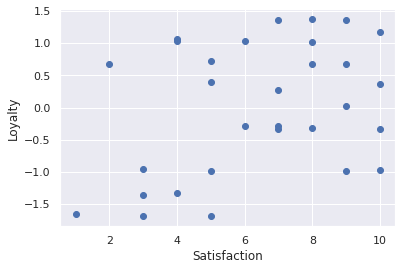

In [18]:
plt.scatter(data['Satisfaction'],data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

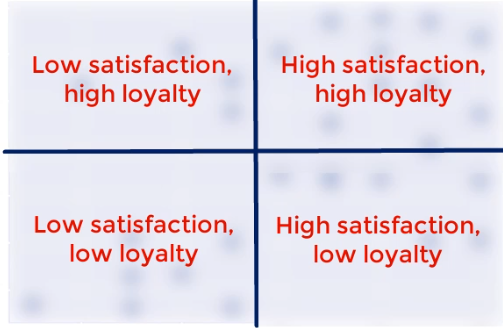

In [19]:
x = data.copy()

In [43]:
kmeans = KMeans(5)

In [44]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [45]:
cluster =x.copy()

In [46]:
cluster['clusters'] = kmeans.fit_predict(x)

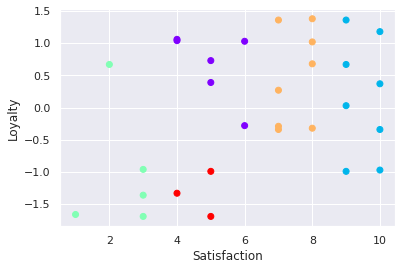

In [47]:
plt.scatter(cluster['Satisfaction'],cluster['Loyalty'],c=cluster['clusters'],cmap ='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

In [48]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [49]:
wcss= []
for i in range(1,10):
  kmeans = KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)

wcss 


[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.4452782965900175,
 4.315662464700005,
 3.687975963852466]

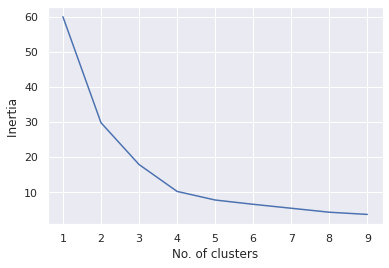

In [50]:
plt.plot(range(1,10),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('Inertia ')
plt.show()

In [55]:
k_new = KMeans(5)
k_new.fit(x_scaled)
cluster_new = x.copy()
cluster_new['Clusters'] = k_new.fit_predict(x_scaled)

In [56]:
cluster_new

,Satisfaction,Loyalty,Clusters
0,4,-1.33,0
1,6,-0.28,4
2,5,-0.99,0
3,7,-0.29,4
4,4,1.06,3
5,1,-1.66,0
6,10,-0.97,2
7,8,-0.32,4
8,8,1.02,1
9,8,0.68,1


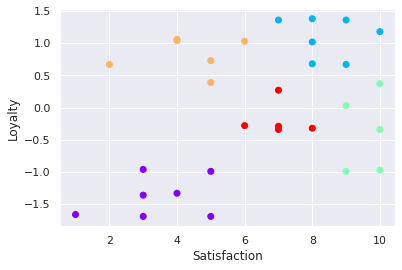

In [57]:
plt.scatter(cluster_new['Satisfaction'],cluster_new['Loyalty'],c=cluster_new['Clusters'],cmap ='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()